# Принятие решения в бизнесе на основе данных

Приоритезация гипотез по увеличению выручки. Запуск A/B-теста и анализ результатов. 

**Необходимо:**
1. *Открыть файл с гипотезами.*
2. *Подготовить данные (изучить данные, проверить типы данных на корректность)*
3. *Применить фреймворки:*
    * ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    * RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    * Укажите, если и как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, если и почему так произошло.

4. *Открыть файлы с результатами A/B теста.*
5. *Проанализируйте A/B-тест*:
   * Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
   * Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
   * Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
   * Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
   * Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
   * Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
   * Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
   * Построить точечный график стоимостей заказов. Сделать выводы и предположения.
   * Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
   * Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
   * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
   * Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
   * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
6. *Принять решение по результатам теста и объясните его (варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест).*


**Описание данных:**
- Hypothesis — краткое описание гипотезы
- Reach — охват пользователей по 10-балльной шкале
- Impact — влияние на пользователей по 10-балльной шкале
- Confidence — уверенность в гипотезе по 10-балльной шкале
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале

- transactionId — идентификатор заказа
- visitorId — идентификатор пользователя, совершившего заказ
- date — дата, когда был совершён заказ
- revenue — выручка заказа
- group — группа A/B-теста, в которую попал заказ
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Содержание:**

<a id='contents'></a>
- Шаг 1 - [Изучение общей информации о данных](#data_import)
- Шаг 2 - [Предобработка данных](#data_preprocessing)
- Шаг 3 - [Приоритезация гипотез](#hypotheses_prioritizing)
- Шаг 4 - [Анализ A/B-теста](#AB_test_test_analysis)
- - [График кумулятивной выручки по группам](#grouped_mean_revenue_diagram)
- - [График кумулятивного среднего чека по группам](#grouped_cumulative_mean_revenue_diagram)
- - [График относительного изменения кумулятивного среднего чека группы B к группе A](#relative_cumulative_mean_revenue_diagram)
- - [График кумулятивной конверсии по группам](#grouped_cumulative_conversion_diagram)
- - [График относительного изменения кумулятивной конверсии группы B к группе A](#cumulative_relative_conversion_diagram)
- - [Точечный график количества заказов по пользователям](#dot_orders_diagram)
- - [Точечный график стоимостей заказов](#dot_revenue_diagram)
- - [Статистическая значимость различий в конверсии между группами по "сырым" данным](#raw_data_conversion_difference)
- - [Статистическая значимость различий в конверсии между группами по "очищенным" данным](#filtered_data_conversion_difference)
- [Общий вывод](#general_conclusion)

<a id='data_import'></a>
## Откроем файлы с данными и изучим общую информацию

*Импортируем нужные библиотеки:*

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
from matplotlib import pyplot as plt
from IPython.display import display

from pandas.plotting import register_matplotlib_converters

*Откроем и изучим данные о гипотезах:*

In [2]:
pd.set_option('display.max_colwidth', 500)

source_hypothesis_data = pd.read_csv('hypothesis.csv')
display(source_hypothesis_data.head(10))
source_hypothesis_data.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


*Откроем и изучим данные о заказах:*

In [3]:
source_orders_data = pd.read_csv('orders.csv')
display(source_orders_data.head(10))
source_orders_data.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


*Откроем и изучим данные о посетителях:*

In [4]:
source_visitors_data = pd.read_csv('visitors.csv')
display(source_visitors_data.head(10))
source_visitors_data.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


<a id='data_preprocessing'></a>
## Предобработка данных:

### Приведение всех текстовых значений к нижнему регистру:

In [5]:
source_hypothesis_data.columns = source_hypothesis_data.columns.str.lower()
source_hypothesis_data['hypothesis'] = source_hypothesis_data['hypothesis'].str.lower()
display(source_hypothesis_data.head())

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [6]:
source_orders_data.columns = source_orders_data.columns.str.lower()
source_orders_data['group'] = source_orders_data['group'].str.lower()
display(source_orders_data.head())

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,b
1,2804400009,3642806036,2019-08-15,730,b
2,2961555356,4069496402,2019-08-15,400,a
3,3797467345,1196621759,2019-08-15,9759,b
4,2282983706,2322279887,2019-08-15,2308,b


In [7]:
source_visitors_data['group'] = source_visitors_data['group'].str.lower()
display(source_visitors_data.head())

,date,group,visitors
0,2019-08-01,a,719
1,2019-08-02,a,619
2,2019-08-03,a,507
3,2019-08-04,a,717
4,2019-08-05,a,756


### Проверка наличия дубликтов:

*В данных о гипотезах:*

In [8]:
doubles_count_1 = source_hypothesis_data.duplicated().sum()
print('Количество дубликатов в данных о гипотезах: {:.0f}'.format(doubles_count_1))

Количество дубликатов в данных о гипотезах: 0


*В данных о заказах:*

In [9]:
doubles_count_2 = source_orders_data.duplicated().sum()
print('Количество дубликатов в данных о заказах: {:.0f}'.format(doubles_count_2))

Количество дубликатов в данных о заказах: 0


*В данных о посетителях:*

In [10]:
doubles_count_3 = source_visitors_data.duplicated().sum()
print('Количество дубликатов в данных о посетителях: {:.0f}'.format(doubles_count_3))

Количество дубликатов в данных о посетителях: 0


### Проверка наличия пропусков:

*В данных о гипотезах:*

In [11]:
print(source_hypothesis_data.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


*В данных о заказах:*

In [12]:
print(source_orders_data.isna().sum())

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64


*В данных о посетителях:*

In [13]:
print(source_visitors_data.isna().sum())

date        0
group       0
visitors    0
dtype: int64


### Преобразование типов данных:

In [14]:
source_orders_data['date'] = source_orders_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
source_orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
source_visitors_data['date'] = source_visitors_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
source_visitors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<a id='hypotheses_prioritizing'></a>
## Приоритизация гипотез

*Применим фреймворк ICE для приоритезации гипотез:*

In [16]:
source_hypothesis_data['ice'] = (source_hypothesis_data['impact'] * source_hypothesis_data['confidence']) / source_hypothesis_data['efforts']

*Отсортируем гипотезы по убыванию приоритета:*

In [17]:
ice_sorted_hypothesis_data = source_hypothesis_data.sort_values(by =['ice'], ascending = False)
display(ice_sorted_hypothesis_data.head())

,hypothesis,reach,impact,confidence,efforts,ice
8,"запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000


*Применим фреймворк RICE для приоритизации гипотез:*

In [18]:
source_hypothesis_data['rice'] = (source_hypothesis_data['reach'] * source_hypothesis_data['impact'] * source_hypothesis_data['confidence']) / source_hypothesis_data['efforts']

*Отсортируем гипотезы по убыванию приоритета:*

In [19]:
rice_sorted_hypothesis_data = source_hypothesis_data.sort_values(by =['rice'], ascending = False)
display(rice_sorted_hypothesis_data.head())

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


**Выводы раздела:**

- Гипотезы "7" и "0" стабильно входят в тройку наилучших гипотез.
- В целом, не меняется даже состав пятёрки наилучших гипотез.
- При применении фреймворка RICE большую роль начинает играть охват. Поэтому, внутри первой пятёрки на первое место вышли гипотезы с наилучшим охватом.
- Так как гипотезы "7" и "0" по ICE довльно близки, то лучше всего выбрать гипотезу с наибольшим охватом - "7".

[В начало](#contents)

<a id='AB_test_test_analysis'></a>
## Анализ A/B-теста

*Создадим массив уникальных пар значений дат и групп:*

In [20]:
datesGroups = source_orders_data[['date','group']].drop_duplicates() 

*Соберём агрегированные кумулятивные по дням данные о заказах:*

In [21]:
ordersAggregated = datesGroups.apply(lambda x: source_orders_data[np.logical_and(source_orders_data['date'] <= x['date'], source_orders_data['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

Соберём агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [22]:
visitorsAggregated = datesGroups.apply(lambda x: source_visitors_data[np.logical_and(source_visitors_data['date'] <= x['date'], source_visitors_data['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

*Создадим обобщающую таблицу с кумулятивными данными:*

In [23]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,a,24,20,148579,719
1,2019-08-01,b,21,20,101217,713
2,2019-08-02,a,44,38,242401,1338
3,2019-08-02,b,45,43,266748,1294
4,2019-08-03,a,68,62,354874,1845


<a id='grouped_mean_revenue_diagram'></a>
***Построим график кумулятивной выручки по группам:***

*Создадим набор данных с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:*

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='a'][['date','revenue', 'orders']]
display(cumulativeRevenueA.head())

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


*Создадим набор данных с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:*

In [25]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='b'][['date','revenue', 'orders']]
display(cumulativeRevenueB.head())

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


*Выведем графики:*

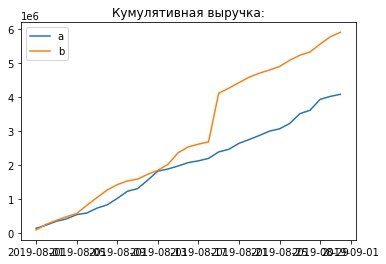

In [26]:
register_matplotlib_converters()

plt.title('Кумулятивная выручка:')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='a')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='b')

plt.legend() 

Выводы и предположения:

- Выручка увеличивается в течение всего теста. Однако графики выручки группы "B" в определённый момент возрастает резко. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в группе.

[В начало](#contents)

<a id='grouped_cumulative_mean_revenue_diagram'></a>
***Построим график кумулятивного среднего чека по группам:***

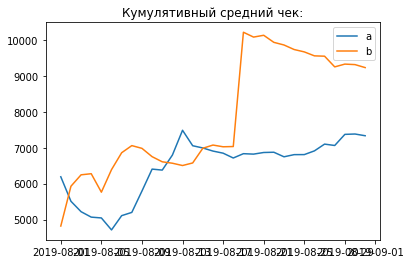

In [27]:
plt.title('Кумулятивный средний чек:')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='a')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='b')
plt.legend() 

Выводы и предположения:

- Средний чек становится равномерным ближе к концу теста. Видно, что к 08-2019 группа "B" была на том же пути к стабилизации, что и группа "A", но совершила резкий скачок из-за некой аномалии, которую на оставшемся протяжении теста стремится сгладить. Вероятно, за счёт последующего набора данных эта аномалия сгладится.

[В начало](#contents)

<a id='relative_cumulative_mean_revenue_diagram'></a>
***Построим график относительного изменения кумулятивного среднего чека группы B к группе A:***

*Соберём данные по кумулятивной выручке в один набор:*

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

*Построим график, добавив ось X:*

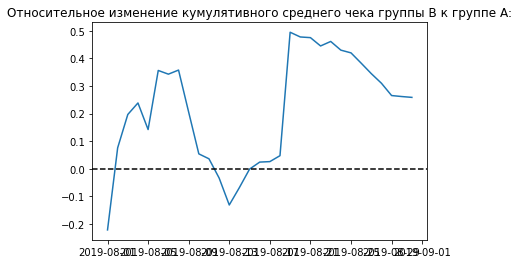

In [29]:
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A:')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

Выводы и предположения:

- Видны резкие скачки на графике, которые свидетельствуют о крупных заказах. Кумулятивное значение среднего чека группы "B" резко превысило кумулятивное значение среднего чека группы "A" за счёт нескольких резких скачков. Дальше превышение предположительн стремится стабилизироваться возле 0,3.

[В начало](#contents)

<a id='grouped_cumulative_conversion_diagram'></a>
***Построим график кумулятивной конверсии по группам:***

*Посчитаем кумулятивную конверсию:*

In [30]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,a,24,20,148579,719,0.033380
1,2019-08-01,b,21,20,101217,713,0.029453
2,2019-08-02,a,44,38,242401,1338,0.032885
3,2019-08-02,b,45,43,266748,1294,0.034776
4,2019-08-03,a,68,62,354874,1845,0.036856


*Выделим набор данных для группы А:*

In [31]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='a']

*Выделим набор данных для группы B:*

In [32]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='b']

*Построим графики:*

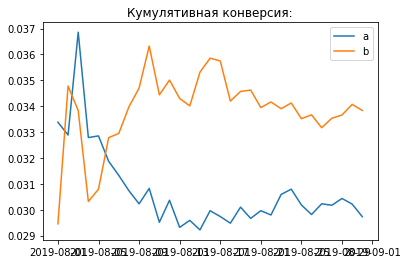

In [33]:
plt.title('Кумулятивная конверсия:')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='a')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='b')
plt.legend()

Выводы и предположения:

- Конверсии групп разделились почти в самом начале, после чего каждая из них начала колебаться возле своего значения. Конверсия группы "B" стабильно превышает конверсию группы "A".

[В начало](#contents)

<a id='cumulative_relative_conversion_diagram'></a>
***Построим график относительного изменения кумулятивной конверсии группы B к группе A:***

*Соберём данные по кумулятивной конверсии в один набор:*

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

*Построим графики:*

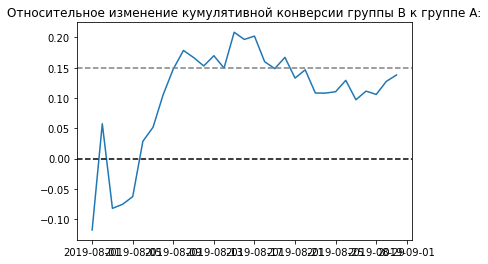

In [35]:
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A:')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

Выводы и предположения:

- Видно, что в обеих группаъ были аномальные заказы, так как вначале гуппа "B" быстро вырвалась вперёд, но затем также быстро сдала позиции группе "A". Тем не менее, после этих скачков начался стабильный рос преобрадания группы "B", которое к концу теста стало колебаться вокруг значения 0,15.

[В начало](#contents)

<a id='dot_orders_diagram'></a>
***Построим точечный график количества заказов по посетителям:***

*Подсчитаем количество заказов по посетителям:*

In [36]:
ordersByVisitors = source_orders_data.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})

ordersByVisitors.columns = ['visitorid','transactions']

display(ordersByVisitors.sort_values(by='transactions',ascending=False).head(10))

,visitorid,transactions
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


*Построим диаграмму:*

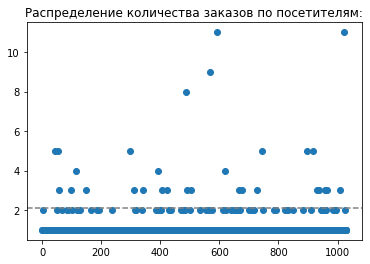

In [37]:
plt.title('Распределение количества заказов по посетителям:')
x_values = pd.Series(range(0,len(ordersByVisitors)))

plt.scatter(x_values, ordersByVisitors['transactions'])
plt.axhline(y=2.1, color='grey', linestyle='--')

Выводы и предположения:

- По графику видно, что основная масса значений лежит до 2-х. Т.е большинство клиентов делают 1 заказ, чуть реже - два заказа.
- Можно выбрать границу аномального количества заказов между 2 и 4. Обратим внимание на то, что принято отсеивать от 1% до 5% наблюдений с крайними значениями.

*Посчитаем 95-й и 99-й перцентили количества заказов на пользователя:*

In [38]:
print(np.percentile(ordersByVisitors['transactions'], [95, 99])) 

[2. 4.]


*Выберем границу для определения аномальных пользователей:*

* Значение больше двух будут являться оптимальным выбором.

[В начало](#contents)

<a id='dot_revenue_diagram'></a>
***Построим точечный график стоимостей заказов:***

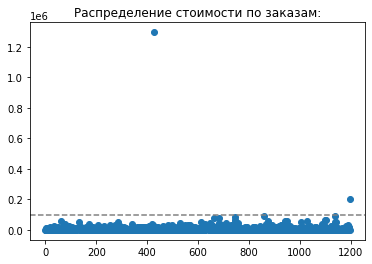

In [39]:
plt.title('Распределение стоимости по заказам:')
x_values = pd.Series(range(0,len(source_orders_data['revenue'])))
plt.axhline(y=100000, color='grey', linestyle='--')
plt.scatter(x_values, source_orders_data['revenue'])

- По графику видно, что основная масса заказов имеют стоимость до 100 000. Есть два аномальных заказа около 200 тысяч и более миллиона двухсот тысячю чуть реже - два заказа.
- Можно выбрать границу аномальной стоимости заказов более 100 000.

*Посчитаем 95-й и 99-й перцентили стоимости заказов:*

In [40]:
print(np.percentile(source_orders_data['revenue'], [95, 99]))

[28000.  58233.2]


*Выберем границу для определения аномальных заказов:*

* Значение больше 30 000 будут являться оптимальным выбором.

[В начало](#contents)

<a id='raw_data_conversion_difference'></a>
***Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным:***

*Сформулируем нулевую и альтернативную гипотезы для статтестов:*

- Нулевая гипотеза 1: конверсии посетителей в группе А и В статистически не отличаются.
- Альтернативная гипотеза 1: конверсии посетителей в группе А и В статистически отличаются.

- Нулевая гипотеза 2: средние чеки в группе А и В статистически не отличаются.
- Альтернативная гипотеза 2: средние чеки в группе А и В статистически отличаются.

*Найдём количество посетителей по датам в группе A:*

In [41]:
visitorsADaily = source_visitors_data[source_visitors_data['group']=='a'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

*Найдём кумулятивную сумму количества посетителей по датам в группе A:*

In [42]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

*Найдём количество посетителей по датам в группе B:*

In [43]:
visitorsBDaily = source_visitors_data[source_visitors_data['group']=='b'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

*Найдём кумулятивную сумму количества посетителей по датам в группе B:*

In [44]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

*Найдём количество заказов и выручку по датам в группе A:*

In [45]:
transactionsADaily = source_orders_data[source_orders_data['group']=='a'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
transactionsADaily.columns = ['date', 'transactionsPerDateA', 'revenuePerDateA']

*Найдём кумулятивную сумму количества заказов и выручки в группе A:*

In [46]:
transactionsACummulative = transactionsADaily.apply(
    lambda x: \
        transactionsADaily[transactionsADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'transactionsPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
transactionsACummulative.columns = ['date', 'transactionsCummulativeA', 'revenueCummulativeA']

*Найдём количество заказов и выручку по датам в группе B:*

In [47]:
transactionsBDaily = source_orders_data[source_orders_data['group']=='b'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
transactionsBDaily.columns = ['date', 'transactionsPerDateB', 'revenuePerDateB']

*Найдём кумулятивную сумму количества заказов и выручки в группе B:*

In [48]:
transactionsBCummulative = transactionsBDaily.apply(
    lambda x: \
        transactionsBDaily[transactionsBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'transactionsPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
transactionsBCummulative.columns = ['date', 'transactionsCummulativeB', 'revenueCummulativeB']

*Соединим полученные данные в один набор для анализа:*

In [49]:
total_raw_data = transactionsADaily.merge(transactionsBDaily, left_on='date', right_on='date', how='left')\
    .merge(transactionsACummulative, left_on='date', right_on='date', how='left')\
    .merge(transactionsBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(total_raw_data.head())

,date,transactionsPerDateA,revenuePerDateA,transactionsPerDateB,revenuePerDateB,transactionsCummulativeA,revenueCummulativeA,transactionsCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


*Посчитаем заказы каждого посетителя, кто сделал хоть один заказ, в группе A:*

In [50]:
transactionsByVisitorsA = source_orders_data[source_orders_data['group']=='a'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
transactionsByVisitorsA.columns = ['visitorid', 'transactions']

*Посчитаем заказы каждого посетителя, кто сделал хоть один заказ, в группе B:*

In [51]:
transactionsByVisitorsB = source_orders_data[source_orders_data['group']=='b'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
transactionsByVisitorsB.columns = ['visitorid', 'transactions']

*Создадим набор данных с количеством заказов каждого посетителя в группе A:*

In [52]:
sampleA = pd.concat([transactionsByVisitorsA['transactions'],pd.Series(0, index=np.arange(total_raw_data['visitorsPerDateA'].sum() - len(transactionsByVisitorsA['transactions'])), name='transactions')],axis=0)

*Создадим набор данных с количеством заказов каждого посетителя в группе B:*

In [53]:
sampleB = pd.concat([transactionsByVisitorsB['transactions'],pd.Series(0, index=np.arange(total_raw_data['visitorsPerDateB'].sum() - len(transactionsByVisitorsB['transactions'])), name='transactions')],axis=0)

*Применим критерий Манна-Уитни, округлив значение до трёх знаков после запятой:*

In [54]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided').pvalue))

0.017


*Выведем относительный прирост конверсии группы B, округлив значение до трёх знаков после запятой::*

In [55]:
print("Относительный прирост равен: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

Относительный прирост равен: 0.138


**Выводы:**

- Вывод: По «сырым» данным различие в конверсиях групп A и B статистически значимо (p-value < 0,05). Значит, верна альтернативная гипотеза:  конверсии посетителей в группе А и В статистически отличаются.
- При этом относительный выигрыш группы B равен 13,8%.

*Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным:*

In [56]:
print("{0:.3f}".format(stats.mannwhitneyu(source_orders_data[source_orders_data['group']=='a']['revenue'], source_orders_data[source_orders_data['group']=='b']['revenue'], alternative = 'two-sided')[1]))

0.729


*Посмотрим различия в среднем чеке между группами:*

In [57]:
print("{0:.3f}".format(source_orders_data[source_orders_data['group']=='b']['revenue'].mean()/source_orders_data[source_orders_data['group']=='a']['revenue'].mean()-1)) 

0.259


**Выводы:**

- P-value значительно больше 0,05 (0,729 > 0,05). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
- При этом средний чек группы B значительно больше среднего чека группы A.

**Выводы подраздела:**

- По «сырым» данным различие в конверсиях групп A и B статистически значимо (p-value < 0,05). Значит, верна альтернативная гипотеза:  конверсии посетителей в группе А и В статистически отличаются.
- При этом относительный выигрыш группы B равен 13,8%.

- По «сырым» данным о среднем чеке P-value значительно больше 0,05 (0,729 > 0,05). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
- При этом средний чек группы B значительно больше среднего чека группы A.

[К началу раздела статистической проверки гипотез](#raw_data_conversion_difference)

[В начало](#contents)

<a id='filtered_data_conversion_difference'></a>
***Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:***

Согласно предыдущим подсчётам не более 5% процентов клиентов сделали 2 заказа и больше, и не более 1% - 4 заказа. Не более 5% заказов было дороже 28000, и не более 1% - дороже 58233.

*Сделаем срез пользователей с числом заказов более двух:*

In [58]:
visitorsWithManyTransactions = pd.concat([transactionsByVisitorsA[transactionsByVisitorsA['transactions'] > 2]['visitorid'], transactionsByVisitorsB[transactionsByVisitorsB['transactions'] > 2]['visitorid']], axis = 0)

*Сделаем срез пользователей, совершивших заказы дороже 30 000:*

In [59]:
visitorsWithExpensiveTransactions = source_orders_data[source_orders_data['revenue'] > 30000]['visitorid']

*Соединим оба эти среза в одном наборе данных для анализа:*

In [60]:
abnormalVisitors = pd.concat([visitorsWithManyTransactions, visitorsWithExpensiveTransactions], axis = 0).drop_duplicates().sort_values()
display(abnormalVisitors.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64

*Узнаем, сколько всего аномальных посетителей:*

In [61]:
display(abnormalVisitors.shape) 

(68,)

*Подготовим набор данных без аномальных посетителей для группы A:*

In [62]:
sampleAFiltered = pd.concat([transactionsByVisitorsA[np.logical_not(transactionsByVisitorsA['visitorid'].isin(abnormalVisitors))]['transactions'],pd.Series(0, index=np.arange(total_raw_data['visitorsPerDateA'].sum() - len(transactionsByVisitorsA['transactions'])),name='transactions')],axis=0)
display(sampleAFiltered.head())

0    1
1    1
2    1
3    1
4    1
Name: transactions, dtype: int64

*Подготовим набор данных без аномальных посетителей для группы B:*

In [63]:
sampleBFiltered = pd.concat([transactionsByVisitorsB[np.logical_not(transactionsByVisitorsB['visitorid'].isin(abnormalVisitors))]['transactions'],pd.Series(0, index=np.arange(total_raw_data['visitorsPerDateB'].sum() - len(transactionsByVisitorsB['transactions'])),name='transactions')],axis=0)
display(sampleBFiltered.head())

0    1
1    1
2    1
3    1
4    1
Name: transactions, dtype: int64

*Применим статистический критерий Манна-Уитни к полученным выборкам:*

In [64]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))

0.013


*Найдём относительный прирост после фильтрафии конверсии группы B:*

In [65]:
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.172


**Вывод:**

- По «очищенным» данным различие в конверсиях групп A и B по прежнему статистически значимо (p-value < 0,05). Значит, верна альтернативная гипотеза:  конверсии посетителей в группе А и В статистически отличаются.
- При этом относительный выигрыш группы B увеличился с 13,8% до 17,2%.

*Рассчитаем статистическую значимость различий в среднем чеке между сегментами после фильтрации:*

In [66]:
print("{0:.3f}".format(stats.mannwhitneyu(
    source_orders_data[np.logical_and(
        source_orders_data['group']=='a',
        np.logical_not(source_orders_data['visitorid'].isin(abnormalVisitors)))]['revenue'],
    source_orders_data[np.logical_and(
        source_orders_data['group']=='b',
        np.logical_not(source_orders_data['visitorid'].isin(abnormalVisitors)))]['revenue'], alternative = 'two-sided')[1]))

0.720


*Найдём относительные различия в среднем чеке между группами после фильтрации:*

In [67]:
print("{0:.3f}".format(
    source_orders_data[np.logical_and(source_orders_data['group']=='b',np.logical_not(source_orders_data['visitorid'].isin(abnormalVisitors)))]['revenue'].mean()/
    source_orders_data[np.logical_and(
        source_orders_data['group']=='a',
        np.logical_not(source_orders_data['visitorid'].isin(abnormalVisitors)))]['revenue'].mean() - 1)) 

-0.023


**Вывод:**

- P-value значительно больше 0,05 (0,720 > 0,05). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
- При этом средний чек группы B стал меньше среднего чека группы A на 0.023.

**Выводы подраздела:**

- По «очищенным» данным различие в конверсиях групп A и B по прежнему статистически значимо (p-value < 0,05). Значит, верна альтернативная гипотеза:  конверсии посетителей в группе А и В статистически отличаются.
- При этом относительный выигрыш группы B увеличился с 13,8% до 17,2%.
- Значение P-value для проверки по критерию Манна-Уитни по «очищенным» данным по прежнему значительно больше 0,05 (0,720 > 0,05). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
- При этом средний чек группы B стал меньше среднего чека группы A на 0.023.

[К началу раздела статистической проверки гипотез](#raw_data_conversion_difference)

**Выводы раздела:**

- Данные по конверсии однозначно отличаются. Если убрать выбросы, то видно, что относительный выигрыш группы B составляет 17,2%.
- "Очистка" данных влияет только на знак прироста среднего чека группы B, что говорит о том, что данные по приросту среднего  чека колеблются возле некоего значения.
- Неоспоримым остаётся прирост конверсии у группы B, что при том же среднем чеке даёт увеличение выручки. Так как увеличение выручки являлось целью, проведение теста можно остановить.

[В начало](#contents)

<a id='general_conclusion'></a>
## Итоговые выводы:

- Гипотезы "7" и "0" стабильно входят в тройку наилучших гипотез.
- В целом, не меняется даже состав пятёрки наилучших гипотез.
- При применении фреймворка RICE большую роль начинает играть охват. Поэтому, внутри первой пятёрки на первое место вышли гипотезы с наилучшим охватом.
- Так как гипотезы "7" и "0" по ICE довльно близки, то лучше всего выбрать гипотезу с наибольшим охватом - "7".

- По «сырым» данным различие в конверсиях групп A и B статистически значимо (p-value < 0,05). Значит, верна альтернативная гипотеза:  конверсии посетителей в группе А и В статистически отличаются.
- При этом относительный выигрыш группы B равен 13,8%.

- По «сырым» данным о среднем чеке P-value значительно больше 0,05 (0,729 > 0,05). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
- При этом средний чек группы B значительно больше среднего чека группы A.- При этом средний чек группы B значительно больше среднего чека группы A.

- По «очищенным» данным различие в конверсиях групп A и B по прежнему статистически значимо (p-value < 0,05). Значит, верна альтернативная гипотеза:  конверсии посетителей в группе А и В статистически отличаются.
- При этом относительный выигрыш группы B увеличился с 13,8% до 17,2%.

- Для среднего чека значение P-value для проверки по критерию Манна-Уитни по «очищенным» данным по прежнему значительно больше 0,05 (0,720 > 0,05). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
- При этом средний чек группы B стал меньше среднего чека группы A на 0,023.

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть тенденция к улучшению и стабилизации в районе 0,15.
- Кумулятивное значение среднего чека группы "B" резко превысило кумулятивное значение среднего чека группы "A" за счёт нескольких резких скачков. Дальше превышение предположительн стремится стабилизироваться возле 0,3.

Решение по результатам теста:

* Тест следует остановить. Неоспоримым остаётся прирост конверсии у группы B, что при том же среднем чеке даёт увеличение выручки. Т.е. цель досигнута.

[В начало](#contents)